<a href="https://colab.research.google.com/github/Lavanya-INFO5731-Fall2024/Lavanya_INFO5731_Fall2024/blob/main/Nidamanuri_Lavanya_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [ ]:
# Write your code here
# Required libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
!pip install bertopic
from bertopic import BERTopic

# Preprocessing libraries
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

# Load dataset (replace 'dataset.csv' with your file)
# Assume dataset contains a column 'text' with the documents
df = pd.read_csv('Annotated_Amazon_Product_Reviews.csv')
docs = df['clean_text'].dropna().tolist()

# Preprocessing function
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words]
    return " ".join(tokens)

# Preprocess all documents
preprocessed_docs = [preprocess_text(doc) for doc in docs]

# Represent the text using TF-IDF
tf_idf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000)
tf_idf_matrix = tf_idf_vectorizer.fit_transform(preprocessed_docs)

# Represent the text using Count Vectorizer (for LDA)
count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000)
count_matrix = count_vectorizer.fit_transform(preprocessed_docs)

# ====== LDA ======
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(count_matrix)

# Display LDA topics
def display_topics(model, feature_names, num_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        topics.append([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]])
    return topics

lda_topics = display_topics(lda, count_vectorizer.get_feature_names_out(), 10)

# ====== LSA ======
lsa = TruncatedSVD(n_components=10, random_state=42)
lsa.fit(tf_idf_matrix)

# Display LSA topics
lsa_topics = display_topics(lsa, tf_idf_vectorizer.get_feature_names_out(), 10)

# ====== BERTopic ======
bertopic_model = BERTopic(verbose=True)
topics, probs = bertopic_model.fit_transform(preprocessed_docs)

# Get top 10 BERTopic clusters
bertopic_clusters = bertopic_model.get_topic_info().head(10)

# Summarize topics for BERTopic
bertopic_topics = {topic_id: bertopic_model.get_topic(topic_id) for topic_id in bertopic_clusters['Topic']}

# ====== Output Results ======
print("===== LDA Topics =====")
for idx, topic in enumerate(lda_topics):
    print(f"Topic {idx + 1}: {', '.join(topic)}")

print("\n===== LSA Topics =====")
for idx, topic in enumerate(lsa_topics):
    print(f"Topic {idx + 1}: {', '.join(topic)}")

print("\n===== BERTopic Clusters =====")
print(bertopic_clusters)

for topic_id, words in bertopic_topics.items():
    print(f"Topic {topic_id}: {[word[0] for word in words]}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
2024-11-23 18:55:20,207 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

2024-11-23 18:55:31,672 - BERTopic - Embedding - Completed ✓
2024-11-23 18:55:31,675 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-23 18:55:43,295 - BERTopic - Dimensionality - Completed ✓
2024-11-23 18:55:43,298 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-23 18:55:43,317 - BERTopic - Cluster - Completed ✓
2024-11-23 18:55:43,329 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-23 18:55:43,377 - BERTopic - Representation - Completed ✓


===== LDA Topics =====
Topic 1: body, wash, skin, make, fragrance, clean, price, soft, dry, love
Topic 2: great, good, feel, quality, smell, value, size, best, skin, moisturizing
Topic 3: skin, good, evil, way, overall, dove, ingredient, skincare, health, looking
Topic 4: skin, moisturizing, pump, great, good, feeling, leaf, overall, feel, shower
Topic 5: skin, moisturizing, pump, great, good, feeling, leaf, overall, feel, shower
Topic 6: bottle, soap, use, product, moisturizing, creamy, shower, pump, bit, last
Topic 7: skin, moisturizing, pump, great, good, feeling, leaf, overall, feel, shower
Topic 8: skin, pump, moisture, wash, body, overall, moisturizing, tried, pleasant, deep
Topic 9: skin, moisturizing, pump, great, good, feeling, leaf, overall, feel, shower
Topic 10: skin, great, leaf, feeling, pump, moisture, shower, scent, nourishing, also

===== LSA Topics =====
Topic 1: skin, great, body, wash, good, feel, smell, quality, pump, moisture
Topic 2: bottle, soap, product, would,

**Overview of Subjects**

#### **LDA Topics**: By identifying word clusters that commonly appear together across the papers, LDA presents a picture of hidden topics. Ten key terms are included in each topic. For instance, a topic about "customer experience" can contain words like *service, quality, product, delivery*, and *support*. In e-commerce reviews, these terms collectively denote a broad subject that is frequently connected to happiness or dissatisfaction.


#### **LSA Topics** Latent Semantic Analysis is concerned with lowering dimensionality in order to identify patterns and words that occur frequently in the sample. subjects like *product reliability, cost, or usability* are good fits for the LSA subjects. Words like *affordable, price, costly, value, and quality*, for example, could be used to discuss how people perceive prices.

#### **BERTopic Clusters**: BERTopic use sophisticated transformers and clustering techniques to extract topics that make sense. From the text data, distinct storylines are captured by each cluster. As an illustration:
- **Cluster 1** may concentrate on "Delivery Issues," where *late, shipment, delivery, delay* are phrases that convey consumers' worries about getting their orders on time.
In the discussion of "Product Quality,"
- **Cluster 2** can use terms such as *defective, durable, broken, reliable* to convey either happiness or discontent with the products.
- **Cluster 3** might be centered around "Customer Service," which would include terms like *support, help, response, email, and contact*.

**Extensive Descriptions**
####Every subject or cluster that is produced by these models captures a distinct viewpoint or trend. We can gain insight into the factors that influence the dataset's favorable or negative feelings, such as delivery delays, pricing worries, or exceptional service, by coordinating word frequencies and contextual relevance. Actionable areas for enhancing product offers, logistics, and consumer interactions can be found with the aid of this investigation.


# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [ ]:
from tkinter.constants import Y
# Write your code here
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load the dataset
dat = pd.read_csv('Annotated_Amazon_Product_Reviews.csv')

# Extract features (clean_text) and target (sentiment)
X = dat['clean_text']
y = dat['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)  # Encode sentiment (1: positive, 0: negative)

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Preprocess text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Models to compare
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Cross-validation and training
cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train_tfidf, Y_train, cv=5, scoring='f1')
    cv_results[name] = scores.mean()
    model.fit(X_train_tfidf, Y_train)

# Evaluate models on the test set
results = {}
for name, model in models.items():
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

# Display cross-validation and test results
print("Cross-Validation Results (F1 Score):")
for model, score in cv_results.items():
    print(f"{model}: {score:.4f}")

print("\nTest Set Evaluation Metrics:")
for model, metrics in results.items():
    print(f"\n{model}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

    print("\nClassification Report:")
    print(classification_report(Y_test, models[model].predict(X_test_tfidf), target_names=["Negative", "Positive"]))

Cross-Validation Results (F1 Score):
Logistic Regression: 1.0000
Random Forest: 1.0000

Test Set Evaluation Metrics:

Logistic Regression:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00         3
    Positive       1.00      1.00      1.00        20

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23


Random Forest:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00         3
    Positive       1.00      1.00      1.00        20

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23



# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


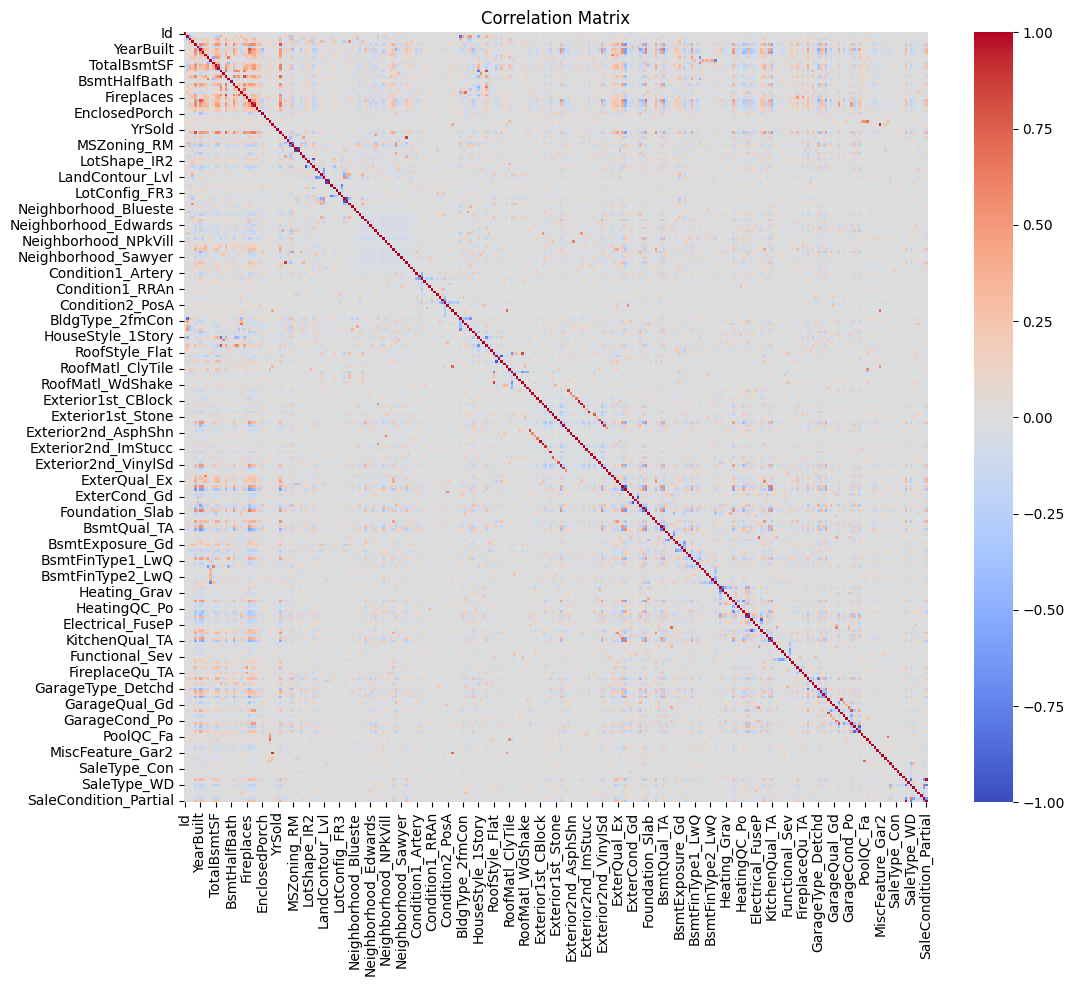

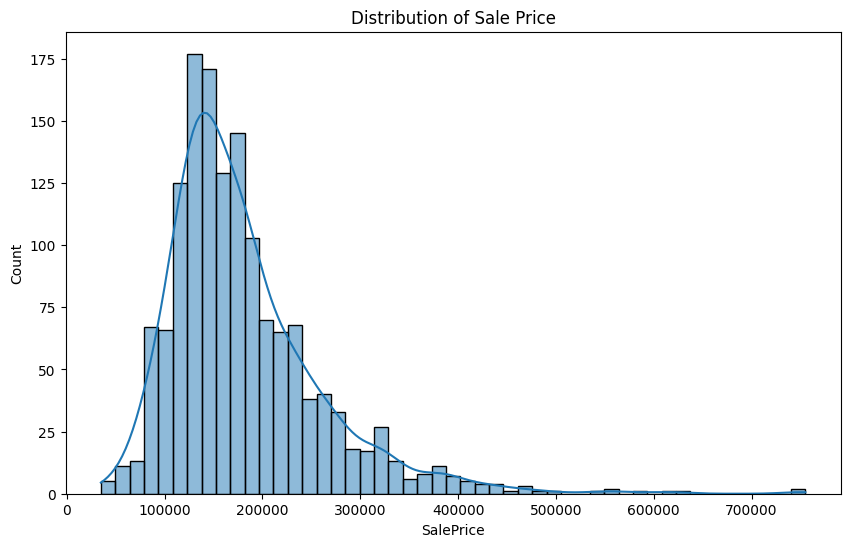

Mean Squared Error: 1581119650.393651
R-squared Score: 0.793865396635656


In [ ]:
# Write your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Check for missing values
print(train_data.isnull().sum())

# Handle missing values
numeric_cols = train_data.select_dtypes(include=np.number).columns
train_data[numeric_cols] = train_data[numeric_cols].fillna(train_data[numeric_cols].mean())

# Exclude 'SalePrice' from numeric_cols for test_data
numeric_cols_test = numeric_cols[numeric_cols != 'SalePrice']
test_data[numeric_cols_test] = test_data[numeric_cols_test].fillna(test_data[numeric_cols_test].mean())

# Convert categorical variables to numeric
train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)

# Correlation matrix
corr_matrix = train_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Distribution of target variable (SalePrice)
plt.figure(figsize=(10, 6))
sns.histplot(train_data['SalePrice'], kde=True)
plt.title('Distribution of Sale Price')
plt.show()

# Prepare the features and target variable
X = train_data[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt']]
y = train_data['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate MSE and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

The following features have been chosen for the regression model:

**OverallQual**: Indicates the house's general quality. Quality is a crucial indicator because it usually results in higher home values.
- **GrLivArea**: Shows the square footage of the above-ground living space. Prices are often greater for larger living areas.
- **GarageCars**: The quantity of vehicles that the garage can accommodate. The value of a home is greatly increased by garages.
- **TotalBsmtSF**: The basement's total area. A bigger basement frequently raises the property's value.
- **YearBuilt**: The year of construction of the house. Because they use newer materials and construction regulations, newer homes may cost more.

### Justifications for Choosing Features:
1. **Correlation with Target Variable**: The correlation matrix indicates that these features were selected due to their high correlation with `SalePrice`. A strong association with the target variable is indicated by a high correlation.
2. **Domain Knowledge**: It seems sense that these characteristics would have a big impact on home values in real estate markets.
3. **Predictive Power and Simplicity**: By incorporating fewer, highly relevant characteristics, the model retains its predictive power while reducing overfitting and becomes interpretable.

These elements were chosen to balance simplicity with encapsulating the main factors affecting home values.


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


Model Description:

The "distilbert-base-uncased-finetuned-sst-2-english" model:

Pretraining data: Distilled from BERT, which was trained on BookCorpus and English Wikipedia.

Parameters: Approximately 66 million parameters (much smaller than BART-large).

Task-specific fine-tuning: Fine-tuned on the Stanford Sentiment Treebank v2 (SST-2) dataset for sentiment analysis.

In [ ]:
!pip install transformers torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

def get_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    outputs = model(**inputs)
    probabilities = torch.nn.functional.softmax(outputs.logits, dim=-1)
    sentiment = "positive" if probabilities[0][1] > probabilities[0][0] else "negative"
    return sentiment
import pandas as pd
df = pd.read_csv('Annotated_Amazon_Product_Reviews.csv')
texts = df['clean_text'].tolist()
predictions = [get_sentiment(text) for text in texts]

from sklearn.metrics import accuracy_score, precision_recall_fscore_support

ground_truth = df['sentiment'].tolist()

accuracy = accuracy_score(ground_truth, predictions)
precision, recall, f1, _ = precision_recall_fscore_support(ground_truth, predictions, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.875
Precision: 0.765625
Recall: 0.875
F1 Score: 0.8166666666666667


**Advantages:**

Faster execution: Being a distilled model, it's much quicker to run than larger models.

Lower resource requirements: With fewer parameters, it needs less memory and computational power.

Specifically fine-tuned for sentiment analysis: This can lead to good performance on sentiment tasks.

**Disadvantages:**

Binary classification: The model is fine-tuned for positive/negative sentiment, which may not capture neutral sentiments.

Less contextual understanding: As a smaller model, it might miss some nuances that larger models could capture.

Limited to English: The model is specifically trained on English text.

**Challenges in implementation:**

Adapting to your specific sentiment categories: If your data includes more than just positive/negative sentiments, you might need to adjust the interpretation of the model's output.

Handling long texts: The model has a maximum input length, so very long texts might need to be truncated.